# 4. 토큰화 Tokenizing

## 4-a. 데이터 읽어오기

In [7]:
# 데이터 읽어오기
import pandas as pd
df = pd.read_csv("3_spaced_text.csv", encoding="utf-8")
df.tail(3)

,search_keyword,date_created,time_created,writer,is_reply,id,spaced_text
1152309,휴젤,2020-04-29,11:55:10,ㅇㅇ(123.215),0,241400125127,미국주식보다 한국꺼보면 ㄹㅇ 암걸릴 것 같음 특히 휴젤 저거 아는분이 임원진인데 회...
1152310,휴젤,2020-04-29,11:56:16,ㅇㄷ(175.223),1,241400125127,한국 상장회사들중에 ㅂㅅ은곳이 넘 많음...
1152311,휴젤,2020-04-29,11:56:38,ㅇㅇ(223.33),1,241400125127,신흥국 회사 투자 망설여지는 게 이거 때문임. 주식시장에 대한 개념이 안 잡혀있음.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152312 entries, 0 to 1152311
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1152312 non-null  object
 1   date_created    1152312 non-null  object
 2   time_created    1152312 non-null  object
 3   writer          1152312 non-null  object
 4   is_reply        1152312 non-null  int64 
 5   id              1152312 non-null  int64 
 6   spaced_text     1152312 non-null  object
dtypes: int64(2), object(5)
memory usage: 61.5+ MB


### 단어 학습을 위한 형태로 저장

In [12]:
texts = df['spaced_text'].tolist()

# txt 파일로 저장
with open('4_spaced_corpus.txt', 'w', encoding='utf-8') as file:
    for text in texts:
        file.write(text + '\n')

## 4-b. Noun Extraction

In [5]:
# soynlp 버전 확인
import sys
sys.path.append('../')

import soynlp
print(soynlp.__version__)

0.0.493


In [13]:
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

# 말뭉치 설정
corpus_path = '4_spaced_corpus.txt'
sents = DoublespaceLineCorpus(corpus_path, iter_sent=True)

In [14]:
# 학습
%%time
noun_extractor = LRNounExtractor_v2(verbose=True, extract_compound=True)
noun_extractor.train(sents)
nouns = noun_extractor.extract()  # nouns 는 {str: NounScore} 형식의 dict 

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 2418267 from 1152312 sents. mem=0.846 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=19305814, mem=6.595 Gb
[Noun Extractor] batch prediction was completed for 611496 words
[Noun Extractor] checked compounds. discovered 744427 compounds
[Noun Extractor] postprocessing detaching_features : 605683 -> 507133
[Noun Extractor] postprocessing ignore_features : 507133 -> 506628
[Noun Extractor] postprocessing ignore_NJ : 506628 -> 500257
[Noun Extractor] 500257 nouns (744427 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=7.520 Gb                    
[Noun Extractor] 76.92 % eojeols are covered
CPU times: total: 4min 9s
Wall time: 4min 9s


In [18]:
list(noun_extractor._compounds_components.items())[:100]

[('시리즈....txt', ('시리즈', '....', 'txt')),
 ('하루.....txt', ('하루', '.....', 'txt')),
 ('마인크래프트....', ('마인크래프트', '....')),
 ('지수추종투자자들', ('지수추종', '투자자들')),
 ('불가능하다해킹', ('불가능하다', '해킹')),
 ('K-메타버스MZ(이', ('K-메타버스', 'MZ', '(이')),
 ('레고켐바이오(141', ('레고켐바이오', '(1', '41')),
 ('위메이드(11204', ('위메이드', '(112', '04')),
 ('알테오젠(19617', ('알테오젠', '(1', '96', '17')),
 ('현대미포조선차트보고', ('현대미포조선', '차트보고')),
 ('캐릭터상품애니메이션', ('캐릭터상품', '애니메이션')),
 ('주주우대환원친화적', ('주주우대', '환원', '친화적')),
 ('회사)하이닉스에스엠', ('회사)', '하이닉스', '에스엠')),
 ('나라입니다그것', ('나라', '입니다', '그것')),
 ('중국남자입니다솔직히', ('중국남자', '입니다', '솔직히')),
 ('프로게이머인터넷방송', ('프로게이머', '인터넷방송')),
 ('쿠션파운데이션', ('쿠션', '파운데이션')),
 ('호식이jyp와플대학', ('호식이', 'jyp', '와플', '대학')),
 ('미디어컨텐츠(빅히트', ('미디어', '컨텐츠', '(빅히트')),
 ('6500018000', ('65000', '18000')),
 ('네이버바이넥스레버리', ('네이버', '바이넥스', '레버리')),
 ('화요일skc7700', ('화요일', 'skc', '7700')),
 ('안산다그룹평균키트와', ('안산다', '그룹', '평균키', '트와')),
 ('남은돈..마지막', ('남은돈', '..', '마지막')),
 ('가수준비중...인생', ('가수', '준비', '중...', '인생')),
 ('챠트1위..일본시장', ('챠

### 결과 요약
* Noun Extraction는 정제된 언어에 적합한 방법인 듯 하다.
* 커뮤니티 text는 특성상 조사가 많이 생략되어있다.
* Word Extraction 을 사용해보자

## 4-c. Word Extraction (1차)

In [23]:
# txt 파일 열기
with open('3_spaced_corpus.txt', 'r', encoding='utf-8') as file:
    # 파일의 각 줄을 읽어 리스트에 저장
    text_list = [line.strip() for line in file]

In [24]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(text_list) # list of str or like
words = word_extractor.extract()

training was done. used memory 11.130 Gbuse memory 12.026 Gb
all cohesion probabilities was computed. # words = 67400
all branching entropies was computed # words = 2148488
all accessor variety was computed # words = 2148488


In [27]:
words['주식']

Scores(cohesion_forward=0.33797058206485, cohesion_backward=0.10211642559233294, left_branching_entropy=4.931513173639989, right_branching_entropy=4.637964581849671, left_accessor_variety=683, right_accessor_variety=655, leftside_frequency=72493, rightside_frequency=4603)

In [28]:
len(words)

31658

In [32]:
# 결과 출력

import math

def word_score(score):
    return (score.cohesion_forward * math.exp(score.right_branching_entropy))

print('단어   (빈도수, cohesion, branching entropy)\n')
for word, score in sorted(words.items(), key=lambda x:word_score(x[1]), reverse=True)[:300]:
    print('%s     (%d, %.3f, %.3f)' % (
            word, 
            score.leftside_frequency, 
            score.cohesion_forward,
            score.right_branching_entropy
            )
         )

단어   (빈도수, cohesion, branching entropy)

..     (7922, 0.842, 5.504)
ㅋㅋㅋ     (121993, 0.817, 5.336)
...     (4516, 0.693, 5.478)
맨날     (2884, 0.814, 5.234)
갑자기     (3942, 0.742, 5.326)
때문에     (12438, 0.610, 5.493)
먼저     (4257, 0.720, 5.287)
!!     (1337, 0.748, 5.214)
ㄹㅇ     (20549, 0.982, 4.876)
펄어비스     (26674, 0.965, 4.881)
^^     (2183, 0.861, 4.992)
죄다     (2282, 0.663, 5.245)
솔직히     (5819, 0.722, 5.141)
존나     (28271, 0.703, 5.097)
카카오     (96629, 0.906, 4.820)
ㅠㅠ     (12462, 0.897, 4.827)
진짜     (32831, 0.462, 5.481)
ㅜㅜ     (3600, 0.878, 4.828)
땜에     (542, 0.771, 4.933)
캬ㅋㅋㅋ     (6933, 0.956, 4.710)
근데     (22345, 0.636, 5.111)
....     (1540, 0.547, 5.260)
셀트리온     (54208, 0.801, 4.867)
잖아     (104, 0.782, 4.878)
함께     (6068, 0.510, 5.303)
ㅇㅇ     (22735, 0.695, 4.990)
넷마블     (14876, 0.911, 4.693)
됩니다.     (1274, 0.875, 4.720)
ㅉㅉ     (1327, 0.945, 4.642)
굳이     (2083, 0.707, 4.933)
jyp     (4353, 0.891, 4.676)
밝혔다.     (6178, 0.787, 4.792)
하이닉스     (46749, 0.540, 5.144)
된

* 구두점, 느낌표가 연달아 있는 걸 1개로 줄여야 한다
* 괄호는 ‘ ‘으로 치환해도 될 듯 하다
* 3_spaced_text.csv 파일을 한 번 더 전처리한다

## 4-d. 전처리 : 3_spaced_text.csv 에 적용

### 파일 읽어오기

In [10]:
# 데이터 읽어오기
import pandas as pd
df = pd.read_csv("3_spaced_text.csv", encoding="utf-8")
df.tail(3)

,search_keyword,date_created,time_created,writer,is_reply,id,spaced_text
1152309,휴젤,2020-04-29,11:55:10,ㅇㅇ(123.215),0,241400125127,미국주식보다 한국꺼보면 ㄹㅇ 암걸릴 것 같음 특히 휴젤 저거 아는분이 임원진인데 회...
1152310,휴젤,2020-04-29,11:56:16,ㅇㄷ(175.223),1,241400125127,한국 상장회사들중에 ㅂㅅ은곳이 넘 많음...
1152311,휴젤,2020-04-29,11:56:38,ㅇㅇ(223.33),1,241400125127,신흥국 회사 투자 망설여지는 게 이거 때문임. 주식시장에 대한 개념이 안 잡혀있음.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152312 entries, 0 to 1152311
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1152312 non-null  object
 1   date_created    1152312 non-null  object
 2   time_created    1152312 non-null  object
 3   writer          1152312 non-null  object
 4   is_reply        1152312 non-null  int64 
 5   id              1152312 non-null  int64 
 6   spaced_text     1152312 non-null  object
dtypes: int64(2), object(5)
memory usage: 61.5+ MB


### 함수 만들기
* 1. 구두점, 느낌표, 반점 연달아 있는 걸 1개로 줄이기
* 2. 괄호는 공백으로 치환

In [6]:
import re
def process_text(input_text):
    # 구두점, 느낌표, 반점 연달아 있는 걸 1개로 줄이기
    reduced_text = re.sub(r'([.,!])\1+', r'\1', input_text)

    # 괄호는 공백으로 치환
    processed_text = re.sub(r'[()\[\]{}]', ' ', reduced_text)
    return processed_text

In [8]:
# 테스트
temp_text = "안녕....(좋은)[아침]!!!!"
new_text = process_text(temp_text)
print(new_text)

안녕. 좋은  아침 !


### df에 적용

In [12]:
df['processed_text'] = df['spaced_text'].apply(process_text)
df.head(3)

,search_keyword,date_created,time_created,writer,is_reply,id,spaced_text,processed_text
0,JYP,2023-06-13,12:50:42,ㅇㅇ,0,10100746844,jyp가반년만에 2배가 올랏네 근디보니는인적자원위주로 하는 사업은먼ㅂㄹ걍제조업이조음..,jyp가반년만에 2배가 올랏네 근디보니는인적자원위주로 하는 사업은먼ㅂㄹ걍제조업이조음.
1,JYP,2023-05-16,17:52:40,ㅇㅇ(118.34),0,10100730087,야 개보지년들아 JYP 주가 봤냐.. 미쳣다 지금... 개잡주 오르는건 그러려니 하...,야 개보지년들아 JYP 주가 봤냐. 미쳣다 지금. 개잡주 오르는건 그러려니 하는데 ...
2,JYP,2023-05-16,17:52:48,ㅇㅇ(118.34),1,10100730087,ㅠㅠ,ㅠㅠ
3,JYP,2023-05-16,18:04:04,ㅇㅇ(203.227),1,10100730087,ㅠㅠ,ㅠㅠ
4,JYP,2023-04-17,22:00:45,설묘.,0,10100714904,니들 jyp 어케 생각해 ㄹㅇ 개미 너무 많이 붙는거 같은데,니들 jyp 어케 생각해 ㄹㅇ 개미 너무 많이 붙는거 같은데
...,...,...,...,...,...,...,...,...
95,JYP,2021-07-01,15:51:33,LoveDog,0,10300080808,jyp NFT플랫폼 사업 진출 ㅋㅋㅋ 왜 하필 두나무 ㅋㅋㅋ,jyp NFT플랫폼 사업 진출 ㅋㅋㅋ 왜 하필 두나무 ㅋㅋㅋ
96,JYP,2021-07-01,15:52:05,KATAOMOI,1,10300080808,두나무 죽지 않고 돌아왔구나,두나무 죽지 않고 돌아왔구나
97,JYP,2021-07-01,16:39:25,[n차]가치투차,1,10300080808,굿즈 오지게 팔겠네,굿즈 오지게 팔겠네
98,JYP,2021-05-20,13:31:21,미꾸없는추어탕,0,10300074573,jyp사라 5퍼는 먹음 ㅇㅇ,jyp사라 5퍼는 먹음 ㅇㅇ


### 결과
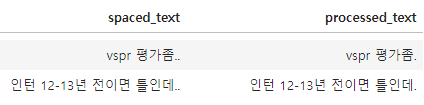
* 잘 적용됨

### 파일로 저장

In [18]:
# 불필요한 칼럼 제거
df_new = df.drop(['spaced_text'], axis=1)

# .csv 파일로ㄹㄷㄹ  저장
df_new.to_csv("4_processed_text.csv", encoding='utf-8', index=False)

## 4-e. Word Extraction (2차)

### 데이터 불러오기

In [2]:
# 데이터 읽어오기
import pandas as pd
df = pd.read_csv("4_processed_text.csv", encoding="utf-8")
df.tail(3)

,search_keyword,date_created,time_created,writer,is_reply,id,processed_text
1152309,휴젤,2020-04-29,11:55:10,ㅇㅇ(123.215),0,241400125127,미국주식보다 한국꺼보면 ㄹㅇ 암걸릴 것 같음 특히 휴젤 저거 아는분이 임원진인데 회...
1152310,휴젤,2020-04-29,11:56:16,ㅇㄷ(175.223),1,241400125127,한국 상장회사들중에 ㅂㅅ은곳이 넘 많음.
1152311,휴젤,2020-04-29,11:56:38,ㅇㅇ(223.33),1,241400125127,신흥국 회사 투자 망설여지는 게 이거 때문임. 주식시장에 대한 개념이 안 잡혀있음.


### 단어 학습을 위한 형태로 저장

In [3]:
texts = df['processed_text'].tolist()

# txt 파일로 저장
with open('4_processed_corpus.txt', 'w', encoding='utf-8') as file:
    for text in texts:
        file.write(text + '\n')

### Word Extraction 

In [4]:
# txt 파일 열기
with open('4_processed_corpus.txt', 'r', encoding='utf-8') as file:
    # 파일의 각 줄을 읽어 리스트에 저장
    text_list = [line.strip() for line in file]

In [5]:
len(text_list)

1152312

In [6]:
# 단어 추출 Word Extraction 
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(text_list) # list of str or like
words = word_extractor.extract()

training was done. used memory 4.204 Gb use memory 5.257 Gb
all cohesion probabilities was computed. # words = 66584
all branching entropies was computed # words = 2037871
all accessor variety was computed # words = 2037871


In [7]:
len(words)

31183

In [8]:
words['주식']

Scores(cohesion_forward=0.33717629873431765, cohesion_backward=0.10133876728236815, left_branching_entropy=4.9386741262979825, right_branching_entropy=4.646658376745716, left_accessor_variety=685, right_accessor_variety=661, leftside_frequency=72940, rightside_frequency=4625)

In [10]:
# 결과 출력

import math

def word_score(score):
    return (score.cohesion_forward * math.exp(score.right_branching_entropy))
    # return score.cohesion_forward
    
# word_score로 정렬
print('단어   (빈도수, cohesion, branching entropy)\n')
for word, score in sorted(words.items(), key=lambda x:word_score(x[1]), reverse=False)[15500:16500]:
    print('%s     (%d, %.3f, %.3f, %.3f)' % (
            word, 
            score.leftside_frequency, 
            score.cohesion_forward,
            score.right_branching_entropy,
            word_score(score)
            )
         )

단어   (빈도수, cohesion, branching entropy)

지켜보는     (173, 0.093, 2.279, 0.908)
식품의약     (746, 0.454, 0.693, 0.908)
걸어     (1844, 0.142, 1.854, 0.908)
말하는게     (147, 0.135, 1.906, 0.908)
자산총액     (110, 0.099, 2.220, 0.908)
어려움이     (142, 0.109, 2.116, 0.908)
라오스     (138, 0.092, 2.295, 0.908)
고인물     (875, 0.109, 2.124, 0.908)
지옥가는     (281, 0.109, 2.118, 0.909)
덧붙였     (1134, 0.909, -0.000, 0.909)
몰려     (1389, 0.065, 2.643, 0.910)
세우는     (143, 0.055, 2.803, 0.910)
색깔     (134, 0.120, 2.023, 0.910)
죽여야     (100, 0.092, 2.288, 0.910)
삼아알미늄     (155, 0.187, 1.583, 0.910)
현금화     (652, 0.068, 2.594, 0.910)
전지사업     (165, 0.099, 2.223, 0.910)
선취매     (231, 0.075, 2.491, 0.911)
칼들고     (125, 0.220, 1.419, 0.911)
61     (3689, 0.056, 2.794, 0.912)
일본이나     (107, 0.105, 2.157, 0.912)
35조     (527, 0.058, 2.757, 0.912)
200만     (1739, 0.181, 1.617, 0.912)
캬ㅋ     (7244, 0.912, -0.000, 0.912)
오스코텍     (298, 0.124, 1.997, 0.912)
Micro     (160, 0.318, 1.055, 0.912)
0.3     (1538, 0.168, 1.690, 0.9

* 눈으로 살펴본 결과, word_score >= 0.972 정도를 기준으로 유의미한 단어를 거르기로 하였다

In [14]:
threshold_score = 0.972

### 토크나이징을 위한 word_scores 딕셔너리 만들기

In [11]:
words_scores = {word: word_score(score) for word, score in words.items()}

In [12]:
len(words_scores)

31183

In [13]:
words_scores['손절']

12.675608957067174

### word_score < threshold_score 인 값 거르기

In [15]:
filtered_scores = {word: score for word, score in words_scores.items() if score >= threshold_score}
len(filtered_scores)

15301

In [16]:
filtered_scores['익절']

15.336528202888847

## 4-f. Tokenizing

### soynlp의 MaxScoreTokenizer 사용
* "파스타" 같은 고유명사에 대해 제대로 이루어지지 않는다 : 파스타 -> 파, 스타

In [18]:
from soynlp.tokenizer import MaxScoreTokenizer

tokenizer = MaxScoreTokenizer(scores=filtered_scores)

print(tokenizer.tokenize('난파스타가좋아요'))
# ['난파', '스타', '가', '좋아', '요']

print(tokenizer.tokenize('난 파스타가 좋아요', flatten=False))
# [[('난', 0, 1, 0.0, 1)], [('파', 0, 1, 0.0, 1), ('스타', 1, 3, 1.7755510510791828, 2), ('가', 3, 4, 0.0, 1)], [('좋아', 0, 2, 3.6970508377878963, 2), ('요', 2, 3, 0.0, 1)]]

['난파', '스타', '가', '좋아', '요']
[[('난', 0, 1, 0.0, 1)], [('파', 0, 1, 0.0, 1), ('스타', 1, 3, 1.7755510510791828, 2), ('가', 3, 4, 0.0, 1)], [('좋아', 0, 2, 3.6970508377878963, 2), ('요', 2, 3, 0.0, 1)]]


### MeCab 사용
* Tokenizer로 MeCab을 사용해보자